# Retail Data

In [29]:
# IMPORT HERE!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [35]:
# df = pd.read_csv("C:\\Users\\dylan.narvadez\\Desktop\\Work Files\\Projects\\Pod 1 myInsurance\\myinsurance_dataset_final.csv")
df = pd.read_csv("C:\\Users\\dylan.narvadez\\Desktop\\Files\\Personal\\Data Science\\GlobalCert Internship\\retail_data.csv", encoding='latin-1')

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeSegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,First 6 months
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,First 6 months
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months


In [207]:
df = df[df["Quantity"] > 0]

In [36]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [23]:
df["InvoiceDate"].agg(["min", "max"])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [26]:
df["CustomerID"].nunique()

4372

**Define new fields**

In [41]:
df["TimeSegment"] =  df["InvoiceDate"].apply(lambda x: "First 6 months" if x <= pd.Timestamp(2011, 6, 6) else "Last 6 months")

In [42]:
df.groupby("TimeSegment").agg(["min", "max"])["InvoiceDate"]

,min,max
TimeSegment,,
First 6 months,2010-12-01 08:26:00,2011-06-05 16:05:00
Last 6 months,2011-06-06 08:04:00,2011-12-09 12:50:00


In [175]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeSegment,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,First 6 months,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,First 6 months,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01


In [83]:
purchase = df.groupby(["CustomerID", "TimeSegment"])["InvoiceNo"].nunique().unstack()
purchase.fillna(0, inplace = True)

In [95]:
purchase["Delta(#)"] = purchase["First 6 months"] - purchase["Last 6 months"]
purchase["Delta(%)"] = (purchase["Delta(#)"]/purchase["First 6 months"])*100
purchase["Trend"] = purchase.apply(lambda row: "Purchase Increased" if row["First 6 months"] < row["Last 6 months"] else "Purchase Decreased", axis = 1)

def change_colour(val):
    return ['background-color: red' if x == "Purchase Decreased"  else 'background-color: green' for x in val]

**Frequency of purchase (unique InvoiceNo) per CustomerID**

In [172]:
# purchase = purchase.sort_values("Delta(#)", ascending = False)
purchase = purchase.sort_values("Delta(%)", ascending = False)

purchase[purchase["First 6 months"] >= 20].style.apply(change_colour, axis = 1, subset = "Trend")

TimeSegment,First 6 months,Last 6 months,Delta(#),Delta(%),Trend
CustomerID,,,,,
17850.000000,35.000000,0.000000,35.000000,100.000000,Purchase Decreased
13113.000000,28.000000,12.000000,16.000000,57.142857,Purchase Decreased
13854.000000,20.000000,9.000000,11.000000,55.000000,Purchase Decreased
14180.000000,21.000000,10.000000,11.000000,52.380952,Purchase Decreased
14298.000000,30.000000,15.000000,15.000000,50.000000,Purchase Decreased
13534.000000,27.000000,16.000000,11.000000,40.740741,Purchase Decreased
15061.000000,34.000000,21.000000,13.000000,38.235294,Purchase Decreased
13777.000000,25.000000,16.000000,9.000000,36.000000,Purchase Decreased
13798.000000,37.000000,26.000000,11.000000,29.729730,Purchase Decreased


In [137]:
# df["InvoiceMonth"] = df["InvoiceDate"] + pd.offsets.MonthBegin(-1)
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period('M').dt.to_timestamp()

In [139]:
country = df.groupby(["Country", "InvoiceMonth"])["InvoiceNo"].count().reset_index()

In [138]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeSegment,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,First 6 months,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,First 6 months,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01


In [128]:
i = -1

<AxesSubplot:xlabel='InvoiceMonth', ylabel='InvoiceNo'>

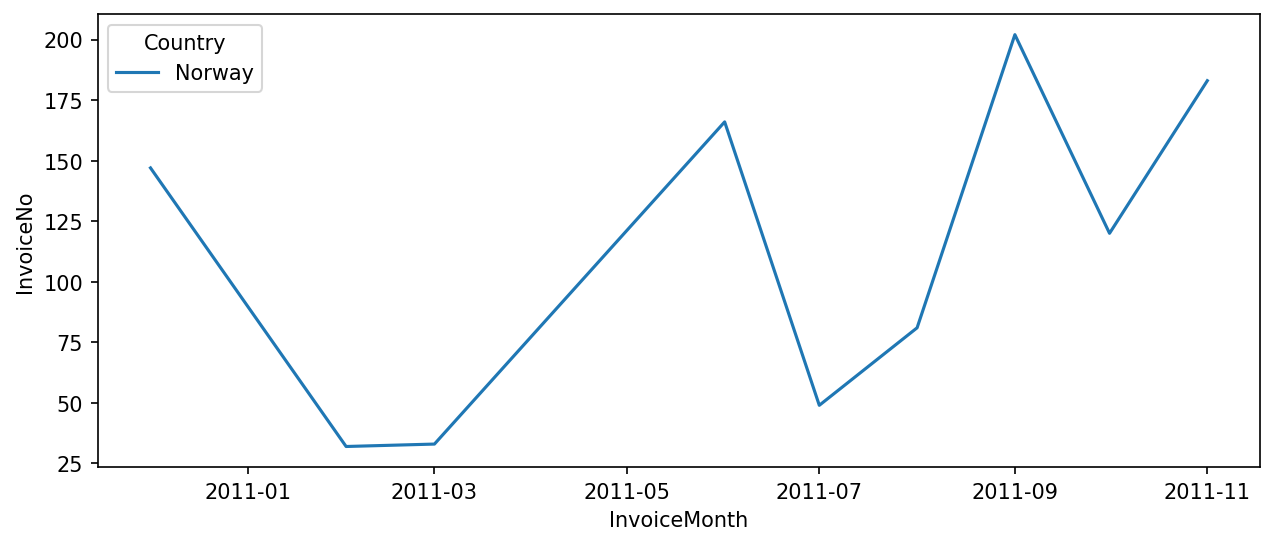

In [174]:
plt.figure(figsize=(10,4),dpi=150)

dist_country = country.Country.unique()
i = i + 1
temp = country[(country["Country"] == dist_country[i])&(country["InvoiceMonth"] != pd.Timestamp(2011, 12, 1))]

sns.lineplot(data = temp, x = "InvoiceMonth", y = "InvoiceNo", hue = "Country")

In [127]:
country.Country.unique()[1]

'Austria'

<AxesSubplot:xlabel='InvoiceMonth', ylabel='InvoiceNo'>

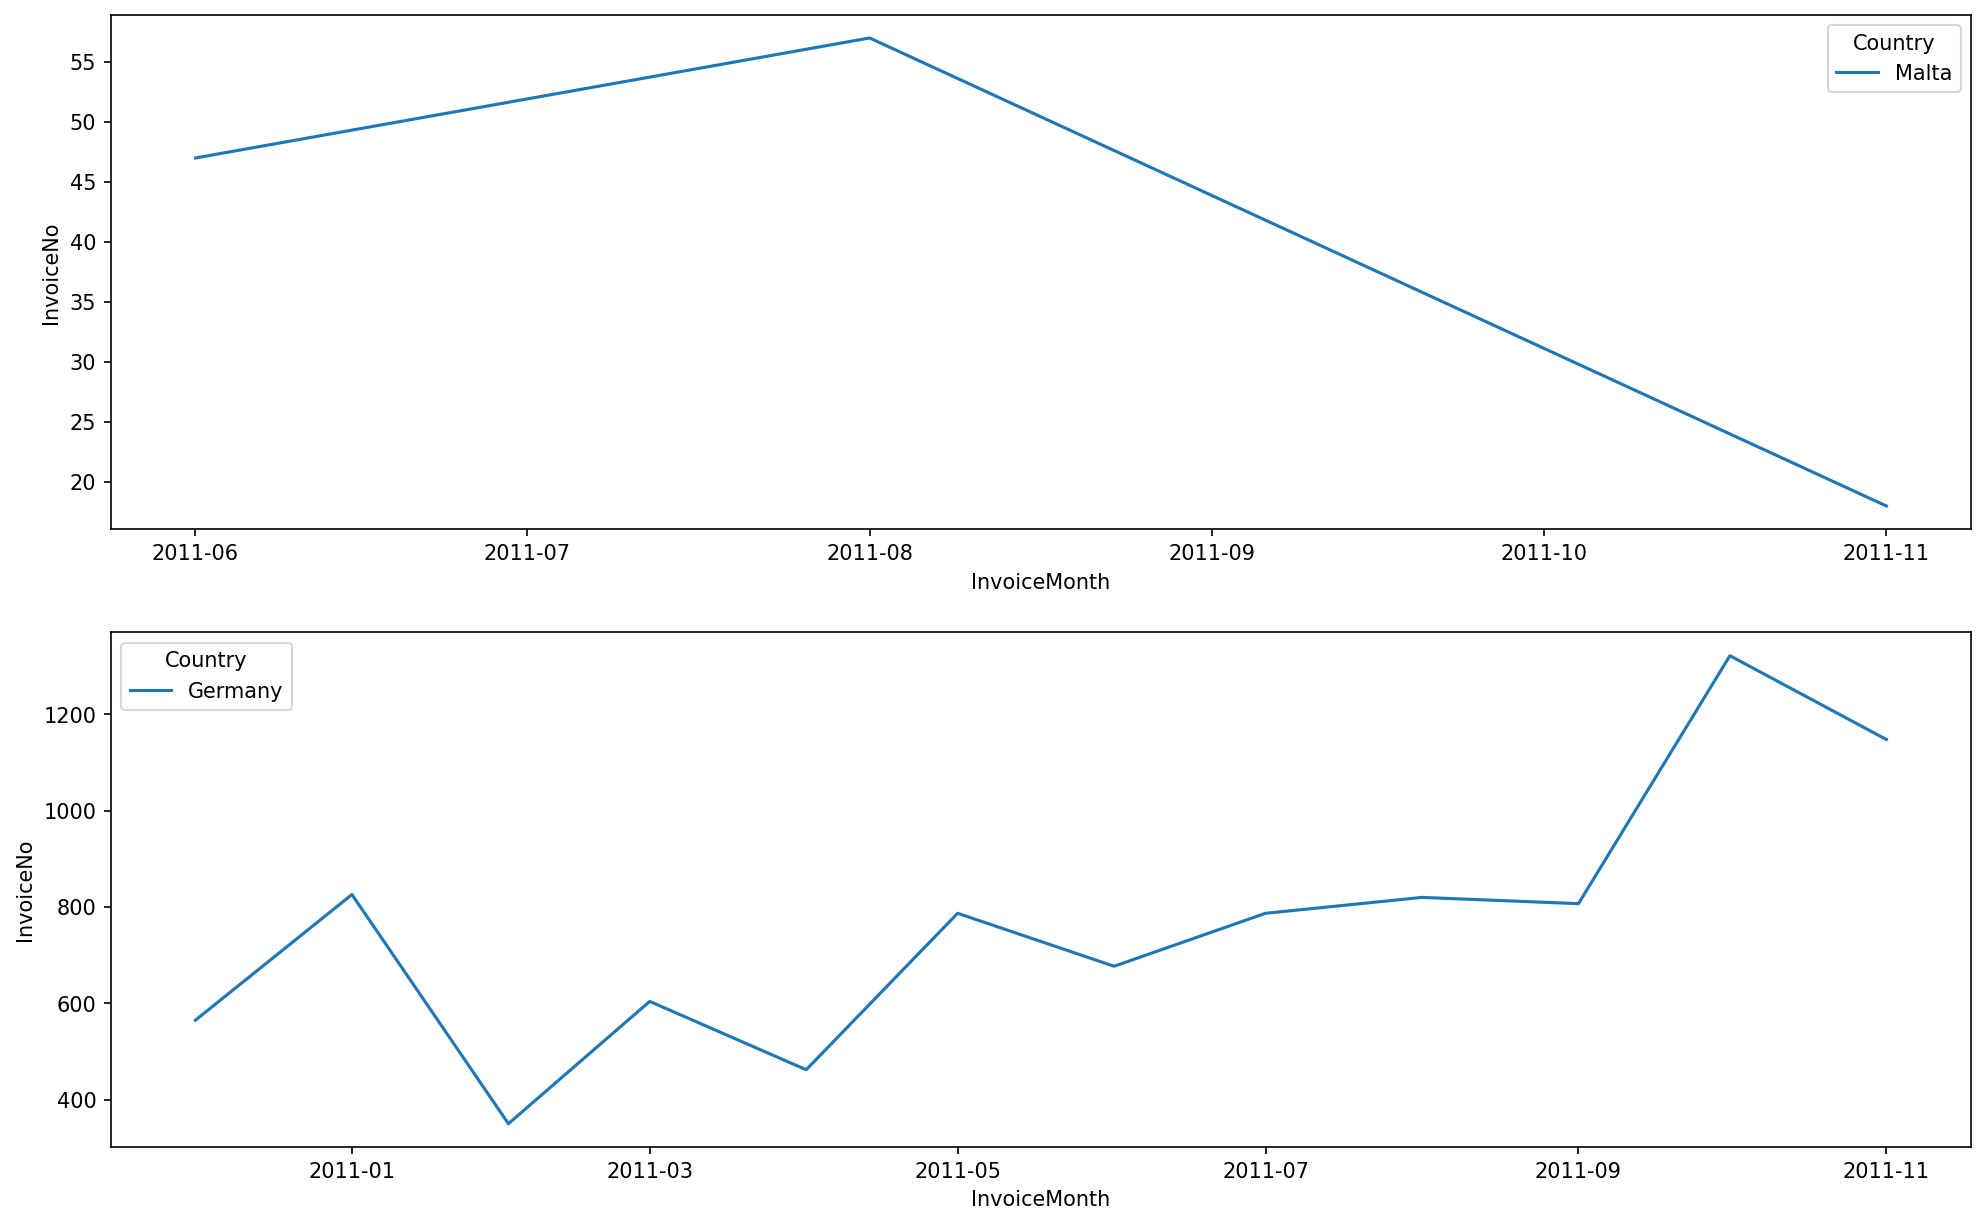

In [171]:
fig, ax = plt.subplots(2, figsize=(16,10),dpi=150)

temp1 = country[(country["Country"] == "Malta")&(country["InvoiceMonth"] != pd.Timestamp(2011, 12, 1))]
temp2 = country[(country["Country"] == "Germany")&(country["InvoiceMonth"] != pd.Timestamp(2011, 12, 1))]

sns.lineplot(ax = ax[0], data = temp1, x = "InvoiceMonth", y = "InvoiceNo", hue = "Country")

sns.lineplot(ax = ax[1], data = temp2, x = "InvoiceMonth", y = "InvoiceNo", hue = "Country")

In [182]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [183]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeSegment,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,First 6 months,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,First 6 months,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01


**Checking which commodity sales dipped**

In [208]:
commodity = df.groupby(["Description", "TimeSegment"])["Quantity"].sum().unstack()
commodity.fillna(0, inplace = True)

In [210]:
commodity["Delta(#)"] = commodity["First 6 months"] - commodity["Last 6 months"]
commodity["Delta(%)"] = (commodity["Delta(#)"]/commodity["First 6 months"])*100
commodity["Trend"] = commodity.apply(lambda row: "Purchase Increased" if row["First 6 months"] < row["Last 6 months"] else "Purchase Decreased", axis = 1)

def change_colour(val):
    return ['background-color: red' if x == "Purchase Decreased"  else 'background-color: green' for x in val]

In [217]:
# commodity = purchase.sort_values("Delta(#)", ascending = False)
commodity = commodity.sort_values("Delta(%)", ascending = False)

commodity[commodity["First 6 months"] >= 1000].style.apply(change_colour, axis = 1, subset = "Trend")

TimeSegment,First 6 months,Last 6 months,Delta(#),Delta(%),Trend
Description,,,,,
ANTIQUE SILVER TEA GLASS ETCHED,4558.000000,0.000000,4558.000000,100.000000,Purchase Decreased
JUMBO BAG SCANDINAVIAN PAISLEY,2059.000000,0.000000,2059.000000,100.000000,Purchase Decreased
LARGE POPCORN HOLDER,1025.000000,0.000000,1025.000000,100.000000,Purchase Decreased
LARGE PINK GLASS SUNDAE DISH,1013.000000,0.000000,1013.000000,100.000000,Purchase Decreased
did a credit and did not tick ret,1300.000000,0.000000,1300.000000,100.000000,Purchase Decreased
incorrectly credited C550456 see 47,1300.000000,0.000000,1300.000000,100.000000,Purchase Decreased
PINK 3 PIECE POLKADOT CUTLERY SET,1471.000000,0.000000,1471.000000,100.000000,Purchase Decreased
S/4 VALENTINE DECOUPAGE HEART BOX,1484.000000,0.000000,1484.000000,100.000000,Purchase Decreased
TEA TIME TEA TOWELS,2600.000000,0.000000,2600.000000,100.000000,Purchase Decreased


In [215]:
commodity["First 6 months"].mean()

531.794456708364

**Conclusion**

1. Insight: There are customers w/ frequent purchase on first half of the year but with little to NO purchase on the latter half.

- Action: create investigation or conduct survey on these specific clients to understand the decline in their purchasing

2. Insight: There are countries with increasing sales over time while some countries are on declining trend.
- Action: to adopt best practices in strategies of those growing countries

3. Some commodities are losing in popularity, i.e. sales volume are declining over time.
- Action: may perform marketing campaigns or promos on those declining commodities